In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
airline = \
pd.read_csv('airline_passengers.csv',
           index_col="Month", parse_dates=True)

In [3]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### simple moving average

In [4]:
airline['6M SMA'] = \
airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12M SMA'] = \
airline['Thousands of Passengers'].rolling(window=12).mean()

In [6]:
airline.head(10)

,Thousands of Passengers,6M SMA,12M SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


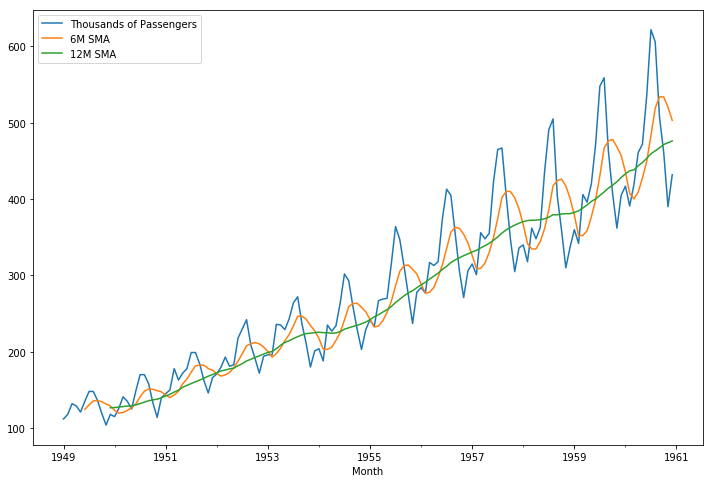

In [7]:
airline.plot(figsize=(12,8))

In [9]:
from sklearn.metrics import mean_squared_error

In [8]:
mean_squared_error(
airline['Thousands of Passengers'] ,airline['6M SMA'].dropna()
)

# 실제값-예측값

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01     10.500000
1949-07-01     17.500000
1949-08-01     12.500000
1949-09-01     -0.166667
1949-10-01    -15.500000
1949-11-01    -27.666667
1949-12-01    -10.833333
1950-01-01     -8.333333
1950-02-01      6.333333
1950-03-01     20.500000
1950-04-01     11.833333
1950-05-01     -1.666667
1950-06-01     17.166667
1950-07-01     29.000000
1950-08-01     21.666667
1950-09-01      6.833333
1950-10-01    -17.833333
1950-11-01    -35.000000
1950-12-01     -7.500000
1951-01-01      1.666667
1951-02-01     10.000000
1951-03-01     34.666667
1951-04-01     14.666667
1951-05-01     14.000000
1951-06-01     13.666667
                 ...    
1958-07-01    104.833333
1958-08-01     87.666667
1958-09-01    -20.333333
1958-10-01    -67.166667
1958-11-01   -107.333333
1958-12-01    -64.000000
1959-01-01    -19.166667
1959-02-01    -10.000000
1959-03-01     53.6

### Weighted Moving Average

In [10]:
airline['WMA12'] = \
airline['Thousands of Passengers'].ewm(span=12).mean()
airline['WMA6'] = \
airline['Thousands of Passengers'].ewm(span=6).mean()

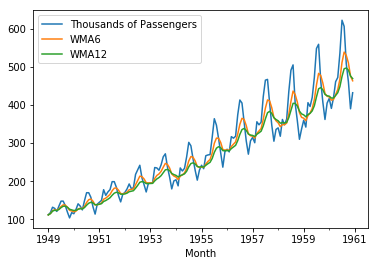

In [12]:
airline[['Thousands of Passengers', 'WMA6', 'WMA12']].plot() # 그래프가 뒤로 덜 밀림. 따라가는 느낌이 아님. 최신 데이터 반영. 윈도우사이즈가 12임에도 불구하고 고저를 잘 따라감

### Simple Exponential Smoothing, Holt's, Holt-Winter's

In [ ]:
#트렌드 반영 ㄴㄴ # 트렌드 # ~반ㅇ영해서 꽤 괜찮은 결과

In [14]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [16]:
train = airline[:'1959']
test = airline['1960':]

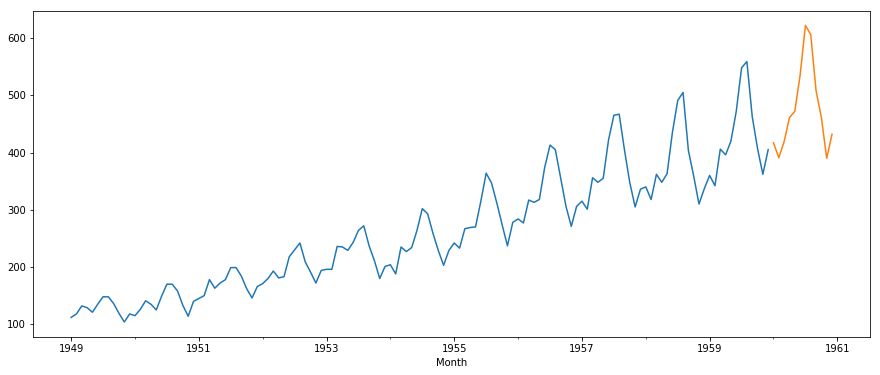

In [17]:
train['Thousands of Passengers'].plot(figsize=(15,6))
test['Thousands of Passengers'].plot() #  train을 분석하여 test를 예측하기. 그래서 예측한 test와 test를 겹쳐 그래서 일치하는지 확인할거야

In [18]:
ses_model = \
SimpleExpSmoothing(np.asarray(train['Thousands of Passengers']))

In [20]:
ses_result = ses_model.fit()

In [21]:
y_hat = test.copy() #test data copy

In [22]:
y_hat['SES'] = ses_result.forecast(len(test)) # test데이터만큼 포캐스터 결과를 보자

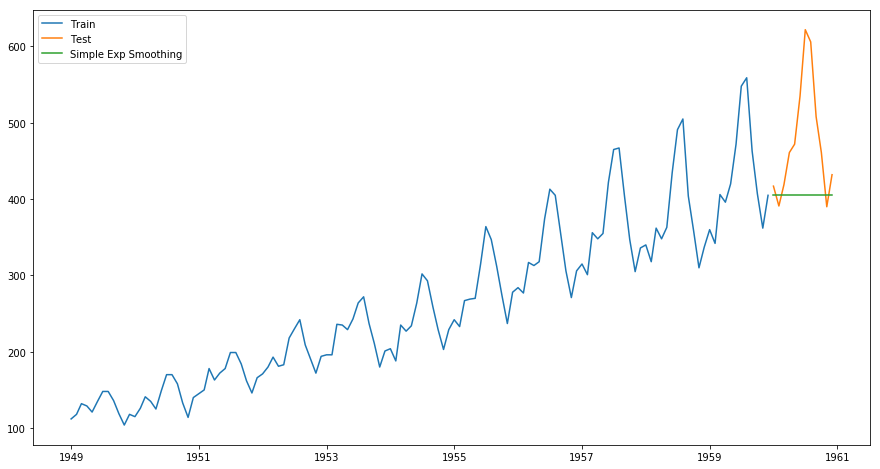

In [25]:
plt.figure(figsize=(15,8))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['SES'], label='Simple Exp Smoothing')
plt.legend()
# 예측이 잘 안됨. 트렌드 반영도 안되어있고 

In [27]:
import numpy as np

In [28]:
rmse = np.sqrt(
    mean_squared_error(test['Thousands of Passengers'], y_hat['SES'])
)

In [29]:
rmse # 요정도의 에러를 가짐

102.97653454387881

### Holt's

In [30]:
from statsmodels.tsa.api import Holt

In [31]:
holt_model = Holt(np.asarray(train['Thousands of Passengers']))

In [32]:
holt_result = holt_model.fit()

In [34]:
y_hat['HOLT'] = holt_result.forecast(len(test))

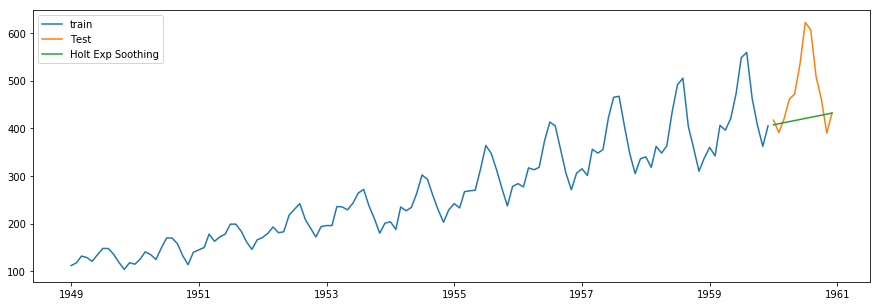

In [36]:
plt.figure(figsize=(15,5))
plt.plot(train['Thousands of Passengers'], label="train")
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['HOLT'],label='Holt Exp Soothing')
plt.legend()
#트랜드 파악 ㅇㅇ, 시즈널리티 파악은 못함

In [37]:
rmse = np.sqrt(
    mean_squared_error(test['Thousands of Passengers'], y_hat['HOLT'])
)

In [38]:
rmse # 앞보다 값이 줄어듦 에러가 줄었다는 말

92.66638892834385

### Holt - Winters

In [39]:
from statsmodels.tsa.api import ExponentialSmoothing

In [42]:
winter_model = ExponentialSmoothing(
    np.asarray(train['Thousands of Passengers']),
    seasonal_periods=12, trend='add', seasonal='add'
)

In [45]:
winter_result=winter_model.fit()

In [46]:
y_hat['WINTER']=winter_model.forecast(len(test))   #### 놓침 ㅠㅠ

AttributeError: 'ExponentialSmoothing' object has no attribute 'forecast'

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(train['Thousands of Passengers'], label="train")
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['HOLT'],label='Holt Exp Soothing')
plt.legend()


In [ ]:
rmse = np.sqrt(
    mean_squared_error(test['Thousands of Passengers'], y_hat['WINTER'])
)

In [ ]:
rmse # 값이 줄었음 

### ARIMA

In [47]:
import statsmodels.api as sm

In [ ]:
ARIMA(p, d, q)(P,D,Q)m #(트랜드)(시즈널리티가 있으면)

In [51]:
arima = sm.tsa.statespace.SARIMAX( #이거 뭔가 이상하다
    train['Thousands of Passengers'],
    order = (2,1,1), # p d q
    seasonal_order = (0,1,0,12), # P D Q m
    enforce_stationarity = False, # 오류가 날 수 있기 때문에 끔
    enforce_invertibility=False

)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [52]:
arima_result=arima.fit()

In [53]:
arima_result.predict(start='1960-01-01',
                    end='1960-12-01', dynamic=True) #dynamic을 쓰면 스타트 값으로 다음꺼 예측, 그 다음에도 스타트 값 또 사용

1960-01-01    420.809659
1960-02-01    406.769525
1960-03-01    468.104766
1960-04-01    460.160351
1960-05-01    482.458292
1960-06-01    535.912669
1960-07-01    610.653691
1960-08-01    622.749196
1960-09-01    525.793980
1960-10-01    470.627543
1960-11-01    424.899910
1960-12-01    468.535154
Freq: MS, dtype: float64

TypeError: float() argument must be a string or a number, not 'Figure'

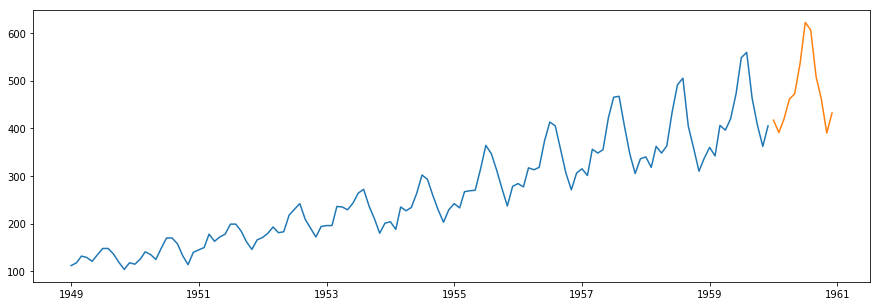

In [57]:
y_hat['ARIMA']=\
plt.figure(figsize=(15,5))
plt.plot(train['Thousands of Passengers'], label="train")
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['ARIMA'],label='Seasonal ARIMA')
plt.legend()


In [55]:
rmse = np.sqrt(
    mean_squared_error(test['Thousands of Passengers'],
                      y_hat['ARIMA'])
)

TypeError: float() argument must be a string or a number, not 'Figure'

In [ ]:
rmse #앞에꺼보다 더 안좋아졌네 ㅠㅠ